# importing dataset

In [4]:
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

# loading dataset

In [7]:
dataset = pd.read_csv('dataset_modified.csv')
dataset.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


C:\Users\User\AppData\Local\Temp\ipykernel_16492\2700011203.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_16492\2700011203.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_16492\2700011203.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=feature, ax=axes[i], palette="viridis")
C:\Users\User\AppData\Local\Temp\i

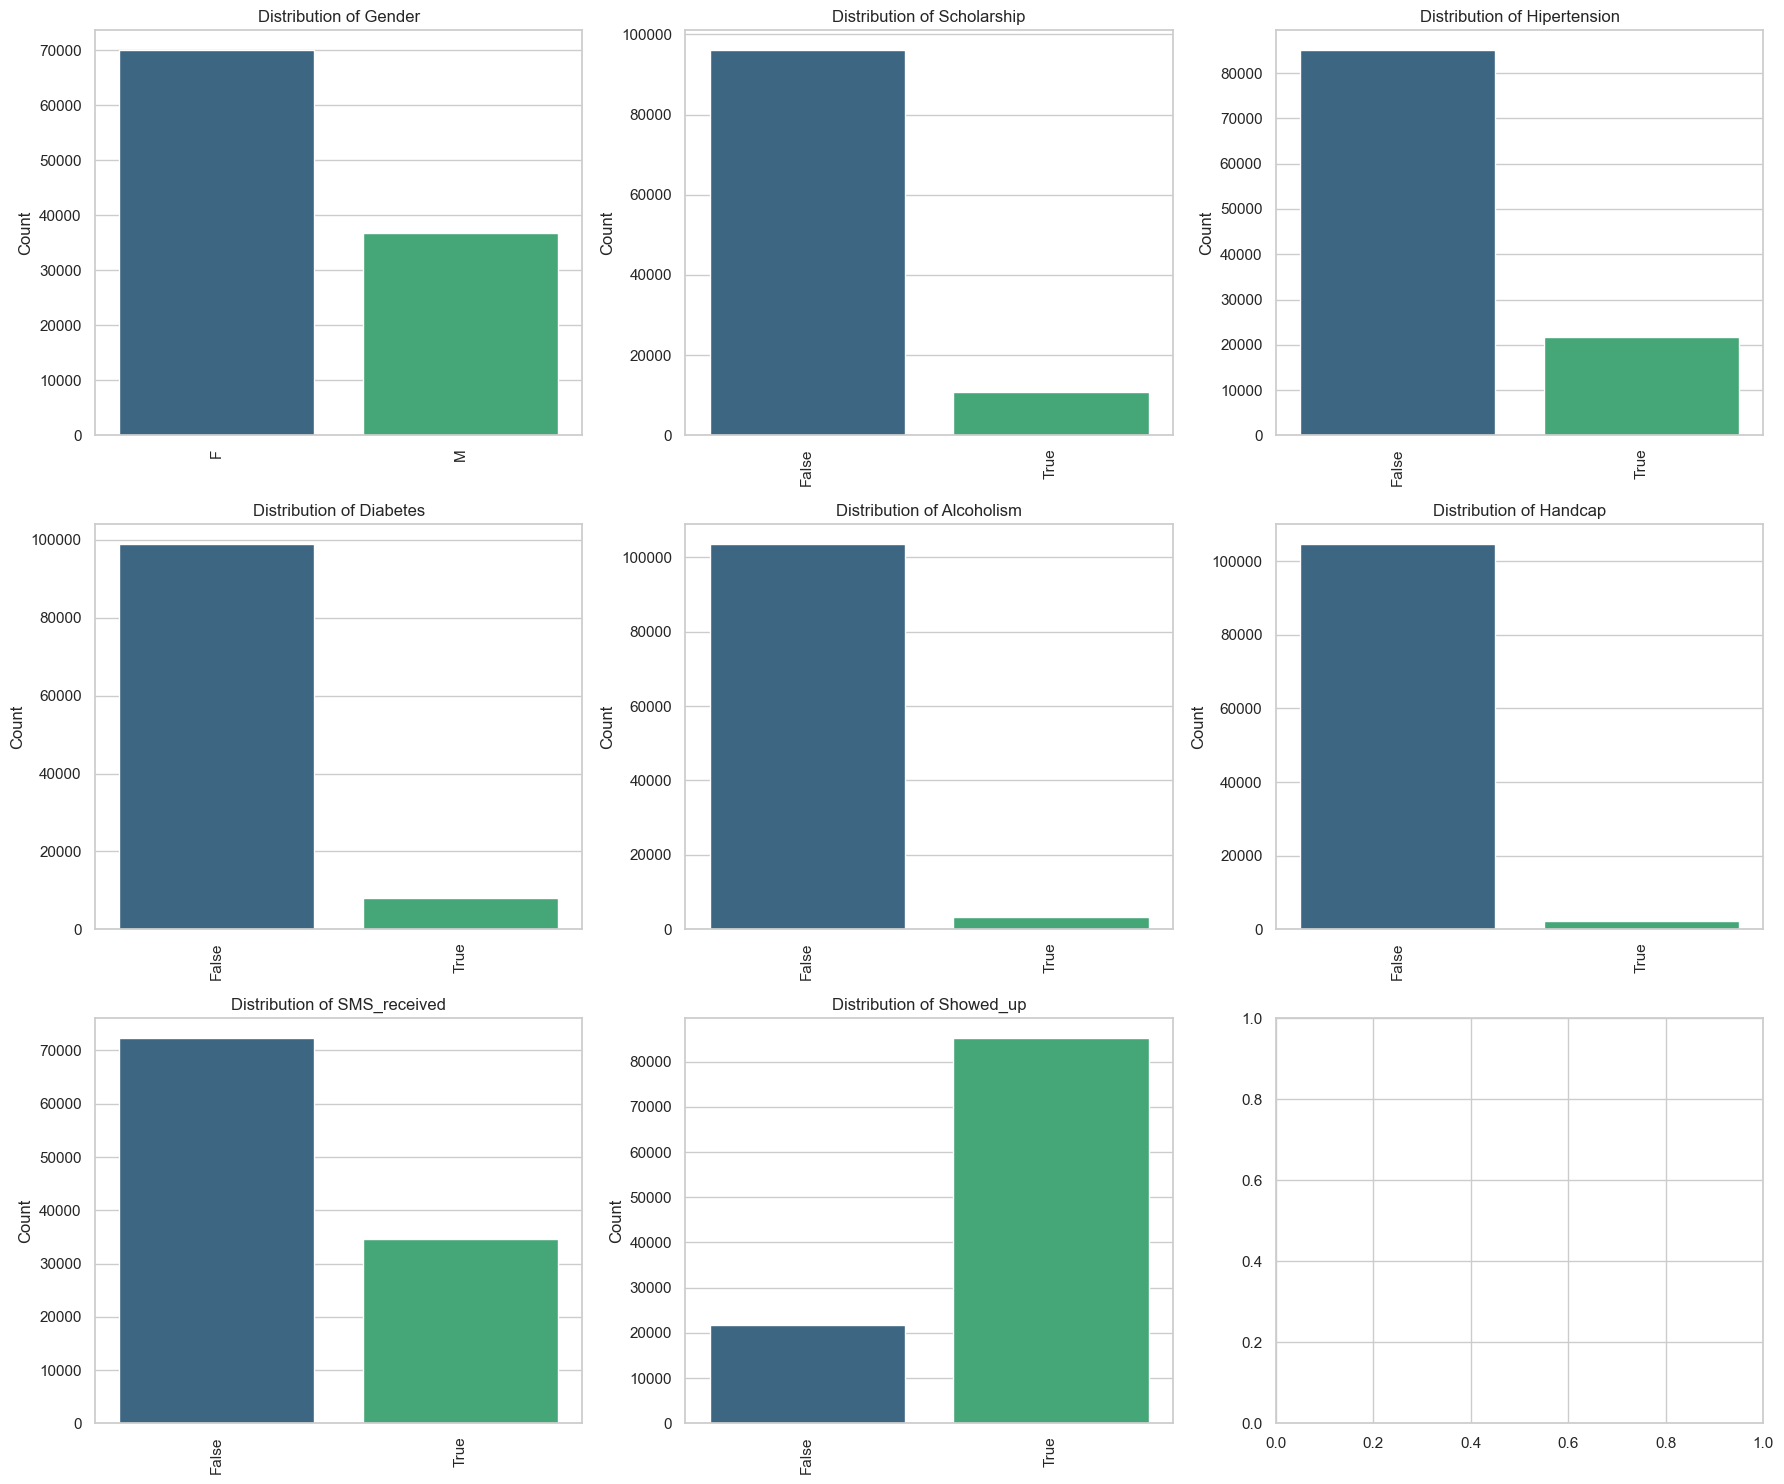

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of categorical features
categorical_features = ['Gender', 'Scholarship', 'Hipertension', 
                        'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']

# Create a figure to hold subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(categorical_features):
     sns.countplot(data=dataset, x=feature, ax=axes[i], palette="viridis")
     axes[i].set_title(f'Distribution of {feature}')
     axes[i].set_xlabel('')
     axes[i].set_ylabel('Count')
     axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
missed_appointment = dataset.groupby('PatientId')['Showed_up'].sum()
missed_appointment = missed_appointment.to_dict()
dataset['missed_appointment_before'] = dataset.PatientId.map(lambda x: 1 if missed_appointment[x]>0 else 0)
dataset['missed_appointment_before'].corr(dataset['Showed_up'])

0.610208652592137

In [16]:
dataset = dataset.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1)
print("Columns: {}".format(dataset.columns))

Columns: Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff', 'missed_appointment_before'],
      dtype='object')


In [18]:
dataset = pd.concat([dataset.drop('Neighbourhood', axis = 1), 
           pd.get_dummies(dataset['Neighbourhood'])], axis=1)

In [20]:
gender_map = {'M': 0, 'F': 1}
dataset['Gender'] = dataset['Gender'].map(gender_map)

# split the data

In [23]:
y = dataset.loc[:, 'Showed_up']
X = dataset.drop(['Showed_up'], axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print("Final shape: {}".format(X_train.shape))

Final shape: (71681, 91)


# fit the algorithm 

In [27]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# Model generation

In [29]:
classifier = Sequential()
classifier.add(Dense(units = 512, activation = 'relu', input_dim = 91))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          47,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,673,665 (10.20 MB)

 Trainable params: 2,673,665 (10.20 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = classifier.fit(X_train, y_train, epochs = 5, validation_split = 0.1)

Epoch 1/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 64s 30ms/step - accuracy: 0.8602 - loss: 0.4283 - val_accuracy: 0.8827 - val_loss: 0.3644
Epoch 2/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8844 - loss: 0.3512 - val_accuracy: 0.8827 - val_loss: 0.3368
Epoch 3/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 58s 29ms/step - accuracy: 0.8833 - loss: 0.3517 - val_accuracy: 0.8825 - val_loss: 0.3485
Epoch 4/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - accuracy: 0.8830 - loss: 0.3481 - val_accuracy: 0.8827 - val_loss: 0.3368
Epoch 5/5
2016/2016 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.8845 - loss: 0.3466 - val_accuracy: 0.8827 - val_loss: 0.3400


# Model prediction

In [32]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

1104/1104 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [ ]:
print("Test data description:")
print("{}".format(y_test.value_counts()))
print("-"*50)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))